<a href="https://colab.research.google.com/github/AbdAllAh950/Algorithms/blob/main/T3_%D0%98%D1%81%D1%81%D0%B0_%D0%90%D0%B1%D0%B4%D0%B0%D0%BB%D0%BB%D0%B0(Abdallah_Essa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, least_squares

In [2]:
# Generate random numbers alpha and beta
np.random.seed(42)  # Fixing seed for reproducibility
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

In [3]:
# Generate x_data: x = k / 100 for k in [1..100]
n = 100  # Total number of points
x_data = np.linspace(1, n, n) / 100

In [4]:
# Generate y_data based on a linear relationship with added noise
y_data = alpha * x_data + beta + np.random.normal(0, 0.1, size=x_data.shape)  # Adding small noise for realism

In [5]:
# Generate correct data: x = k / 100 for k in [1..100]
n = 100  # Total number of points
x_data = np.linspace(1, n, n) / 100

In [6]:
# Generate y_data based on a linear relationship with added noise
y_data = alpha * x_data + beta + np.random.normal(0, 0.1, size=x_data.shape)  # Adding small noise for realism

In [7]:
# Generate random numbers alpha and beta
np.random.seed(42)  # Fixing seed for reproducibility
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

In [8]:
# Define the linear and rational approximants
def linear_approximant(x, a, b):
    return a * x + b

In [9]:
def rational_approximant(x, a, b):
    return a / (x + b)

In [10]:
# Define the objective function to minimize (least squares)
def objective_function_linear(params, x, y):
    a, b = params
    return np.sum((linear_approximant(x, a, b) - y) ** 2)

In [11]:
def objective_function_rational(params, x, y):
    a, b = params
    return np.sum((rational_approximant(x, a, b) - y) ** 2)

In [12]:
# Define the Jacobian for the linear and rational approximants
def jacobian_linear(params, x, y):
    a, b = params
    grad_a = 2 * np.sum(x * (linear_approximant(x, a, b) - y))
    grad_b = 2 * np.sum(linear_approximant(x, a, b) - y)
    return np.array([grad_a, grad_b])

In [13]:
def jacobian_rational(params, x, y):
    a, b = params
    grad_a = 2 * np.sum((rational_approximant(x, a, b) - y) / (x + b))
    grad_b = -2 * np.sum(a * (rational_approximant(x, a, b) - y) / ((x + b) ** 2))
    return np.array([grad_a, grad_b])

In [14]:
# Initial guesses for a and b
initial_guess = [1, 1]

# Set optimization options
tolerance = 1e-3

In [16]:
# Perform linear optimization using different methods
# Gradient Descent (using scipy's minimize with BFGS)
linear_result_gd = minimize(objective_function_linear, initial_guess, args=(x_data, y_data), method='BFGS', tol=tolerance)

# Newton's Method (using Newton-CG and providing the Jacobian)
linear_result_newton = minimize(objective_function_linear, initial_guess, args=(x_data, y_data), method='Newton-CG', jac=jacobian_linear, tol=tolerance)

# Levenberg-Marquardt (using least_squares for non-linear least squares)
linear_result_lm = least_squares(lambda params: linear_approximant(x_data, *params) - y_data, initial_guess, method='lm', xtol=tolerance)

In [17]:
# Print results for linear approximation
print("Linear Approximation Results:")
print(f"Gradient Descent: a = {linear_result_gd.x[0]}, b = {linear_result_gd.x[1]}")
print(f"Newton's Method: a = {linear_result_newton.x[0]}, b = {linear_result_newton.x[1]}")
print(f"Levenberg-Marquardt: a = {linear_result_lm.x[0]}, b = {linear_result_lm.x[1]}")

Linear Approximation Results:
Gradient Descent: a = 0.3701588535562617, b = 0.957911896477117
Newton's Method: a = 0.370158851992353, b = 0.9579118929249537
Levenberg-Marquardt: a = 0.3701588507008723, b = 0.9579118933857791


In [19]:
# Perform rational optimization using different methods
# Gradient Descent (using scipy's minimize with BFGS)
rational_result_gd = minimize(objective_function_rational, initial_guess, args=(x_data, y_data), method='BFGS', tol=tolerance)

# Newton's Method (using Newton-CG and providing the Jacobian)
rational_result_newton = minimize(objective_function_rational, initial_guess, args=(x_data, y_data), method='Newton-CG', jac=jacobian_rational, tol=tolerance)

# Levenberg-Marquardt (using least_squares for non-linear least squares)
rational_result_lm = least_squares(lambda params: rational_approximant(x_data, *params) - y_data, initial_guess, method='lm', xtol=tolerance)

In [20]:
# Print results for rational approximation
print("\nRational Approximation Results:")
print(f"Gradient Descent: a = {rational_result_gd.x[0]}, b = {rational_result_gd.x[1]}")
print(f"Newton's Method: a = {rational_result_newton.x[0]}, b = {rational_result_newton.x[1]}")
print(f"Levenberg-Marquardt: a = {rational_result_lm.x[0]}, b = {rational_result_lm.x[1]}")


Rational Approximation Results:
Gradient Descent: a = 1668.4209854230207, b = 1450.440777553551
Newton's Method: a = 191.18640621509923, b = 166.4157381050147
Levenberg-Marquardt: a = 135057339.14980108, b = 117970275.3533012


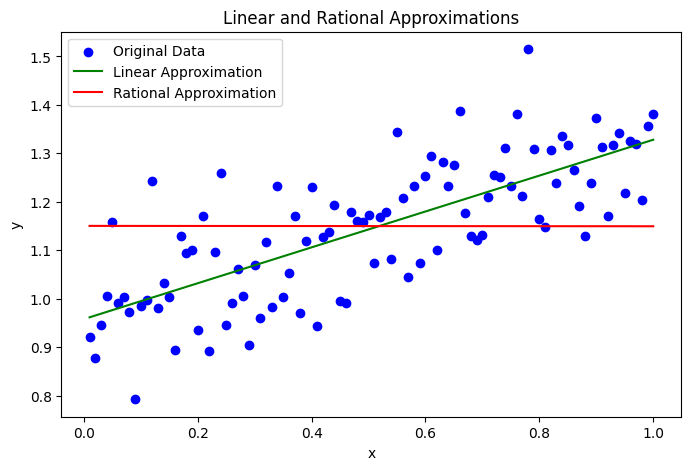

In [22]:
# Plotting the original data
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label="Original Data", color="blue")

# Linear approximation (Gradient Descent result)
y_linear = linear_approximant(x_data, *linear_result_gd.x)
plt.plot(x_data, y_linear, label="Linear Approximation", color="green")

# Rational approximation (Gradient Descent result)
y_rational = rational_approximant(x_data, *rational_result_gd.x)
plt.plot(x_data, y_rational, label="Rational Approximation", color="red")

# Final plot adjustments
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear and Rational Approximations")
plt.legend()
plt.show()